In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import warnings
warnings.filterwarnings("ignore")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

<h1>1. Equation of Linear Regression</h1>

**Linear Regression is a supervised learning algorithm that models the relationship between input variables (𝑋) and an output variable (y) by fitting a linear equation to the data.**

y = w1x1 + w2x2 + ... + wnxn + b

in linear algebric way we can use

Y = XW + b
where the W is the vector of weights N matrix of X NxM the output is the vector M Y 🚀

<h1>1. Gradient Descent Optimization</h1>

**we Initialize with some default numbers the weights and we optimize it to fit do data which we have to do that we can use Gradient Descent Optimization**
To do Gradient Descent we need loss function from which we can deacrease the weights.
we use  Mean Squared Error (MSE)
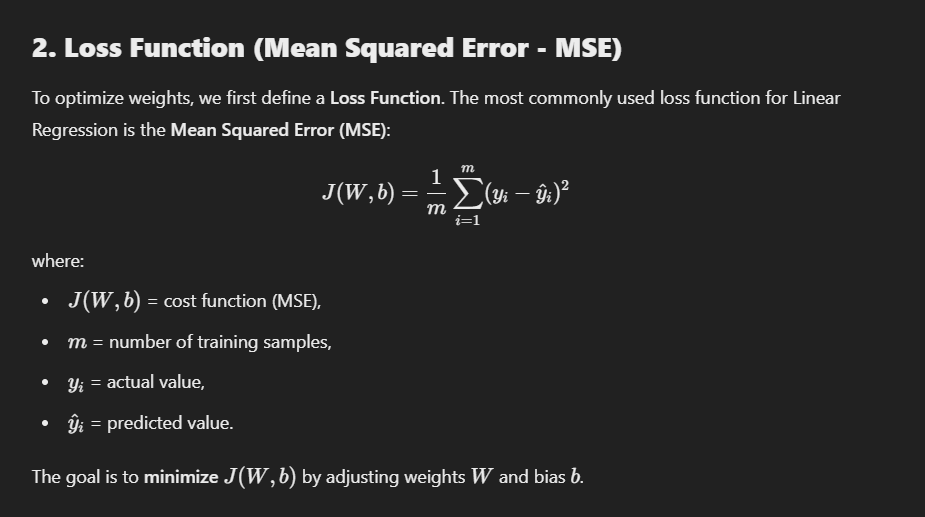

We get gradient from Cost function respect to W and b then we update our weights and bias.

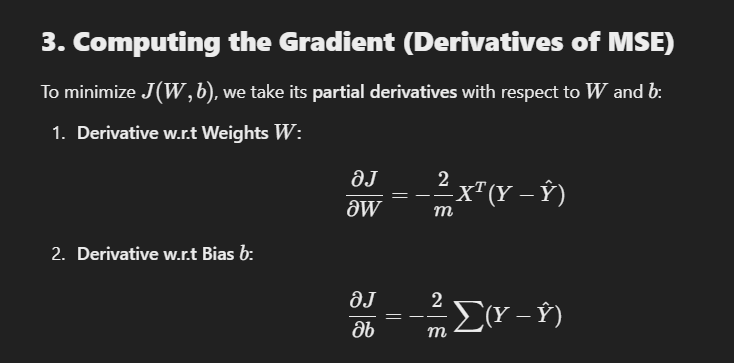

the update rule we use <br>
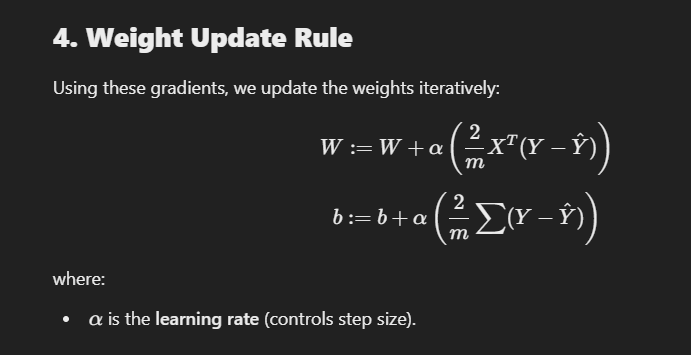

In [2]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [3]:
class CustomLinearRegression:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None

    def fit(self, X, Y):
        m, n = X.shape
        self.weights = np.zeros((n, 1))
        self.bias = 0

        for _ in range(self.epochs):
            if _ % 100 == 0:
                print(f"{_} epoch _______________________________")
            Y_pred = np.dot(X, self.weights) + self.bias

            dw = (2/m)*np.dot(X.T, (Y_pred - Y))
            db = (2/m) * np.sum(Y_pred - Y)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias
        

    def score(self, Y_true, Y_pred):
        ss_total = np.sum((Y_true - np.mean(Y_true)) ** 2)
        ss_residual = np.sum((Y_true - Y_pred) ** 2)
        return 1 - (ss_residual / ss_total)


0 epoch _______________________________
100 epoch _______________________________
200 epoch _______________________________
300 epoch _______________________________
400 epoch _______________________________
500 epoch _______________________________
600 epoch _______________________________
700 epoch _______________________________
800 epoch _______________________________
900 epoch _______________________________
1000 epoch _______________________________
1100 epoch _______________________________
1200 epoch _______________________________
1300 epoch _______________________________
1400 epoch _______________________________
1500 epoch _______________________________
1600 epoch _______________________________
1700 epoch _______________________________
1800 epoch _______________________________
1900 epoch _______________________________

📊 R² Score: 0.8072
📉 Bias (Intercept): 6.7636
📈 Weight (Slope): [1.63051407]


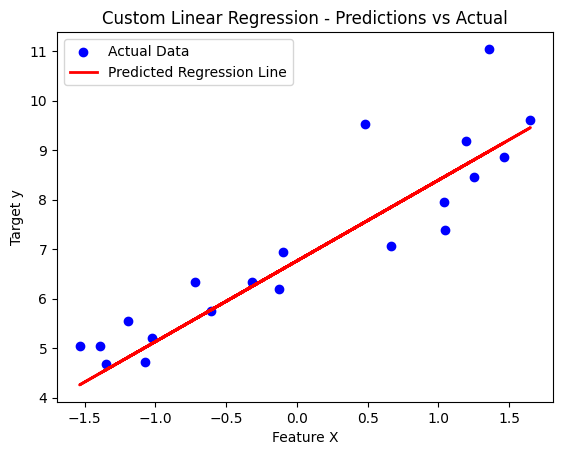

In [4]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# ✅ Generate synthetic regression data
np.random.seed(42)
X = 2 * np.random.rand(100, 1)  # 100 samples, 1 feature
y = 4 + 3 * X + np.random.randn(100, 1)  # True relationship: y = 4 + 3x + noise

# ✅ Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ✅ Normalize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ✅ Train the Custom Linear Regression model
model = CustomLinearRegression(learning_rate=0.01, epochs=2000)
model.fit(X_train, y_train)

# ✅ Make predictions
y_pred = model.predict(X_test)

# ✅ Evaluate model performance
r2_score = model.score(y_test, y_pred)
print(f"\n📊 R² Score: {r2_score:.4f}")
print(f"📉 Bias (Intercept): {model.bias:.4f}")
print(f"📈 Weight (Slope): {model.weights.flatten()}")

# ✅ Plot results
plt.scatter(X_test, y_test, color="blue", label="Actual Data")
plt.plot(X_test, y_pred, color="red", linewidth=2, label="Predicted Regression Line")
plt.xlabel("Feature X")
plt.ylabel("Target y")
plt.legend()
plt.title("Custom Linear Regression - Predictions vs Actual")
plt.show()
